<a href="https://colab.research.google.com/github/himasnhu018/DogCatImageClassification/blob/main/DogsAndCatsIdentifierModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import os

In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

# data collection
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# process and defining the image dimensions
val_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)


validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(150, 150, 3),
                                               include_top=False,
                                               weights='imagenet')


base_model.trainable = False


model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#model compilation

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

<ipython-input-4-36ed33a34586>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(input_shape=(150, 150, 3),


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from sklearn.utils import class_weight
import numpy as np


class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)

class_weights_dict = dict(enumerate(class_weights))

In [ ]:
# history = model.fit(
#     train_generator,
#     steps_per_epoch=steps_per_epoch,
#     epochs=2
# )

NameError: name 'steps_per_epoch' is not defined

In [ ]:
# traning
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator), # Calculate steps_per_epoch based on train_generator
    epochs=2
)

Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 57s 493ms/step - accuracy: 0.7483 - loss: 0.5026
Epoch 2/2
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 268us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


Saving cat.997.jpg to cat.997.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediction probability: 0.1169
The model predicts this image is a **Cat**.


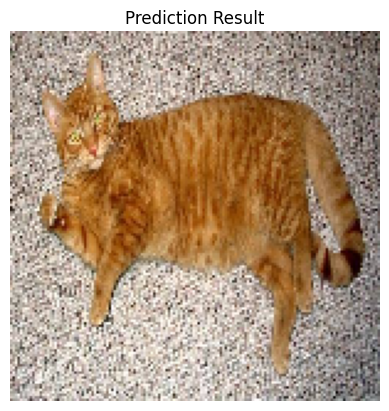

In [ ]:
uploaded = files.upload()

# processing

img_path = list(uploaded.keys())[0]


img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0


prediction = model.predict(img_array)


print(f"Prediction probability: {prediction[0][0]:.4f}")

if prediction[0][0] < 0.5:
    print("The model predicts this image is a **Cat**.")
else:
    print("The model predicts this image is a **Dog**.")


plt.imshow(img)
plt.axis('off')
plt.title("Prediction Result")
plt.show()